# Consigne - To remove
L'évaluation consiste pour chacun à rédiger un notebook sur un thème imposé. Vous rédigez pour un lecteur qui a suivi le cours AML (ou un équivalent suffisamment proche) ; le notebook doit être jouable en 1h à 1h30. Une grille de notation est joint pour vous permettre de vous guider dans l'exercice. 

L'idée est de traiter le sujet de manière démonstrative, sans nécessairement reproduire un article académique sur le sujet. Pour chaque sujet, au moins un article a été trouvé, mais je vous encourage à explorer la littérature pour trouver des articles connexes. Je ne vous demande pas une bibliographie extensive ni un état de l'art, mais lire un ou deux articles de référence sur le sujet (et les citer dans le notebook) est une bonne base. Google Scholar et Wikipedia sont de bons points de départ, les articles de blog sur Medium et les échanges sur Quora sont moins fiables.  Les principaux points attendus sont que le notebook:

- présente le sujet
- explique la problématique, la théorie, les grands principes
- permet de pratiquer sur des outils
- illustre les propriétés

Vous êtes assez libres dans votre traitement du sujet : si un aspect vous intéresse plus qu'un autre, vous êtes libres de le traiter. On attend un traitement *en profondeur* du sujet, sous une forme *didactique*. On doit retrouver dans votre notebook des éléments qui introduisent la problématique, amènent des intuitions sur le sujet, exposent une analyse scientifique et apportent des outils. On suppose que votre lectorat est un étudiant type de niveau Supaero 3A ou Master 2.

Les notebooks seront à rendre pour le dimanche 10/01 minuit sur LMS. Puis, lundi 11/01, vous aurez à évaluer 4 notebooks dans deux binôme différents , selon la grille affinée que je vous fournirai. L'évaluation doit être remise le 15/01 avant minuit. Le plus important dans ces évaluations est dans les commentaires que vous rédigerez : je vous demande donc de rédiger une review et d'argumenter votre note pour permettre aux auteurs de s'améliorer. Chaque personne aura écrit un notebook et en aura joué quatre. Chaque notebook aura reçu deux notes en co-évaluation, qui seront complétées par la note d'un correcteur externe.

# Interpretability of Machine Learning algorithms, through InterpretML.

This notebook is mainly based on the following paper [_"InterpretML: A Unified Framework for Machine Learning Interpretability" (H. Nori, S. Jenkins, P. Koch, and R. Caruana 2019)_. \[1\]](https://arxiv.org/abs/1909.09223)

Some ressources about the InterpretML:
- Paper [PDF link](https://arxiv.org/pdf/1909.09223)
- GitHub [interpretml/interpret](https://github.com/interpretml/interpret)
- Website [interpret.ml](https://interpret.ml/)

This notebook was done by [Ludovic Sterlin](https://github.com/LudovicSterlin) as the evaluation part of Supervized and Deep Learning of [SDD-Algorithms in Machine Learning](https://supaerodatascience.github.io/syllabus.html).

## Prerequesites
This notebook was build for __Python 3.8+__

Install InterpretML python package with `pip`
```
pip install interpret
```

In [3]:
# You can do it from here by un-commenting the line below and running this cell
# !pip install interpret

In [1]:
import pandas as pd
import numpy as np
import interpret
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from IPython.lib.display import YouTubeVideo
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.model_selection import train_test_split

<div class="alert alert-success">
    If there was no problem with this import cell you should be good to go !
</div>

# 1. Background
Since you are following this notebook you are probably aware that Machine learning has become more an more popular in the past decades. To illustrate this, you can observe, thanks to the graphics below, the increase in popularity of AI, DL and ML in the recent decades, through the number of appearances in paper title relative to the total number of papers in a designated year.
![fig1_ratio_publi_AI.png](img/fig1_ratio_publi_AI.png)
<center>Figure 1: Ratio of publications with the selected terms in their title over time. <a href=https://medium.com/@thegcamilo/the-growth-of-ai-and-machine-learning-in-computer-science-publications-603d75467c38>Source [2]</a></center>

As machine learning has matured into wide-spread adoption, building models that users can understand is becoming increasingly important. To build such models we need __interpretability__ and __explanability__. Moreover, it has become a criteria for selecting an algorithm for high-risk or safety-critical applications such as aeronautics/aerospatial, healthcare, finance and judicial environments. 

For example aeronautics systems need to match regulatory requirements. In Europe, EASA (European Union Aviation Safety Agency) claims that one of the main challenges for AI trustworthiness is “Lack of predictability and explainability of the ML application behavior” [[3]](https://www.easa.europa.eu/newsroom-and-events/news/easa-publishes-joint-report-learning-assurance-neural-networks).

Model interpretability helps developers, data scientists and business stakeholders in the organization gain a comprehensive understanding of their machine learning models. It can also be used to debug models, explain predictions and enable auditing to meet compliance with regulatory requirements.

Right now I hope you think that __Interpretability__ seems great ! But you probably wonder how do we do that ?

Well in the next section we will see one solution proposed in the [paper [1], InterpretML](https://arxiv.org/abs/1909.09223).

# 2. Presentation of InterpretML
To respond to this need of explainability and interpretability, a group of Microsoft researchers behind this paper (H. Nori, S. Jenkins, P. Koch, and R. Caruana) proposed __InterpretML__. In their own words: _"InterpretML is an open-source Python package which exposes machine learning interpretability algorithms to practitioners and researchers._

InterpretML divides algorithms explainability in two categories __glassbox__ models and __blackbox__ interpretability.
- __Glassbox__: Regroup machine learning models designed for interpretability, they are interpretable due to their structure. Besides the regular scikit learn models , Glassbox contains a new model called Explainable Boosting Machine (EBM), we will come back to this last one later.
- __Blackbox__: Black-box models are challenging to understand, for example deep neural networks. Blackbox explainers regroup techniques for explaining existing systems like [LIME [4]](https://github.com/marcotcr/lime), [SHAP [5]](https://github.com/slundberg/shap) and Partial Dependence. They can analyze the relationship between input features and output predictions to interpret models.

To accomplish this, InterpretML follows 4 key principles: _Ease of comparison_, _Stay true to the source_, _Play nice with others_, _Take what you want_. Those principles allow you to access __state-of-the-art interpretability techniques through an open unified API set and rich intercative visualizations__. Also, to use and extend any component of InterpretML. Finally, it leverages the open-source ecosystem and emphasizes extensibility and compatibility with popular open-source projects ([pandas [6]](https://www.researchgate.net/publication/265194455_pandas_a_Foundational_Python_Library_for_Data_Analysis_and_Statistics), [scikit-learn [7]](https://dl.acm.org/doi/10.5555/1953048.2078195), [Jupyter Notebook [8]](https://eprints.soton.ac.uk/403913/)).


The code architecture and unified API is best expressed in Figure 2, providing an overview and relevant example code.
![fig2_IML_API.png](img/fig2_IML_API.png)
![fig2_IML_CodeEx.png](img/fig2_IML_CodeEx.png)
<center>Figure 2: API architecture and code examples</center>

<div class="alert alert-warning">If you want to know more about what you can do with InterpretML, before going into the practical examples, you can quickly scroll through the website below or go to <a href="https://interpret.ml/">interpret.ml</a></div>

In [5]:
%%html
<iframe src="https://interpret.ml" width="1000" height="600"></iframe>

## 2.1 Simple example
Let's use [`make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html?highlight=blobs#sklearn.datasets.make_blobs) from sklearn to make simple 2D examples.

X1.shape=(1000, 2), y1.shape=(1000,), type(X1)=<class 'numpy.ndarray'>, type(y1)=<class 'numpy.ndarray'>


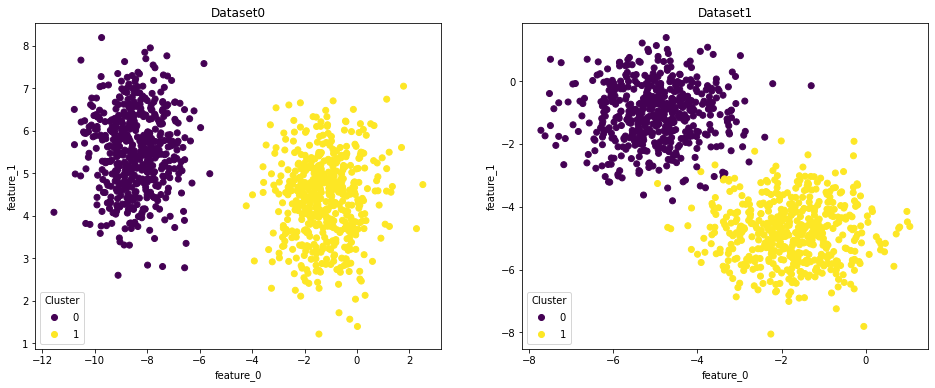

In [6]:
def plot_blobs(seed=21, index=0):
    # generate 2 blobs with 1000 samples per blob
    # seed is use so everyone see the same thing but you can play with it
    X, y = make_blobs(n_samples=1000, centers=2, random_state=seed)
    scatter = plt.scatter(X[:,0], X[:,1], c=y)
    plt.xlabel("feature_0")
    plt.ylabel("feature_1")
    plt.title(f"Dataset{index}")
    ax = plt.gcf().get_axes()[index]
    legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Cluster")
    return X, y
    

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
seed = 7
X1, y1 = plot_blobs(seed, 0)
print(f"{X1.shape=}, {y1.shape=}, {type(X1)=}, {type(y1)=}")

X2, y2 = make_blobs(n_samples=1000, centers=2, random_state=seed)
plt.subplot(1,2,2)
seed = 33
X2, y2 = plot_blobs(seed, 1)

We have now two datasets; `Dataset0` is meant to be the "easy" one and `Dataset1` a little bit more tricky.

If I ask YOU, how would you do to separate the cluster in those two cases ?

<div class="alert alert-info"><a href="#answer2" data-toggle="collapse">   
    Ready to see my answer? (click to expand)</a><br>
    <div id="answer2" class="collapse">
        <ul>
            <li>Dataset0: I would certainly only use <code>feature_0</code> with a threshold arround -5.</li>
            <li>Dataset1: It's more tricky; it seems like the upper left corner is "Cluster 0" and lower right corner is "Cluster 1". But what about the middle ? We can't "simply" draw a line between the clusters...</li>
        </ul>
    </div>
</div>

So let's now see how a simple ML algorithms would perform on these datasets, and if InterpretML can helps us to see how the algorithm learned to seperate the clusters. Will it "think" like us ?

InterpretML enforce a scikit-learn style uniform API. So you will not be lost if you've used sklearn before,
`.fit()` and `.predict()` are still your friends.

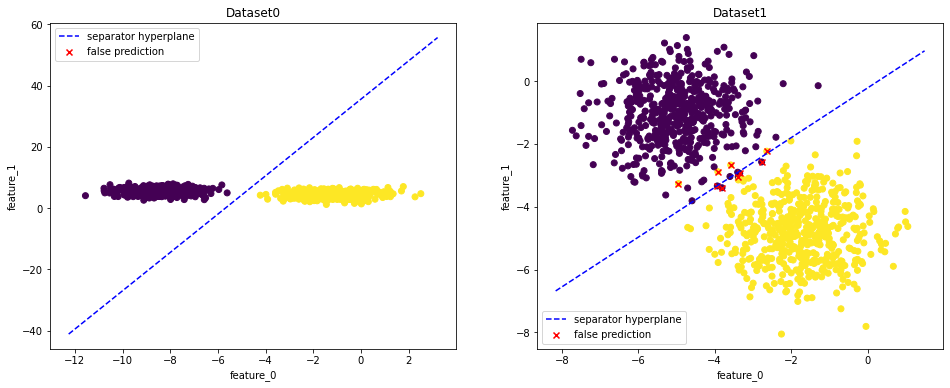

In [7]:
from interpret import show
from interpret.data import ClassHistogram
from interpret.glassbox import LogisticRegression

datasets = [(X1,y1), (X2,y2)]
plt.figure(figsize=(16,6))
clfs = []
for i, (X,y) in enumerate(datasets):
    clf = LogisticRegression()
    clf.fit(X,y.reshape(-1,1)) # we don't split the dataset here because we don't really care about score or overfitting in this basic example
    clfs.append(clf)
    # predict value
    y_pred = clf.predict(X)

    # plot bad prediction
    plt.subplot(1,2,i+1)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.scatter(X[np.where(y != y_pred),0], X[np.where(y != y_pred),1], c='red', marker="x", label="false prediction")
    plt.xlabel("feature_0")
    plt.ylabel("feature_1")
    plt.title(f"Dataset{i}")
    
    # Plot the hyperplan classifiers
    xmin, xmax = plt.gcf().get_axes()[i].get_xlim()
    def plot_hyperplane(clf, color='b'):
        # We can access sklearn object from interpret object through .sk_model_ attribute
        coef = clf.sk_model_.coef_
        intercept = clf.sk_model_.intercept_
        def line(x0):
            return (-(x0 * coef[0, 0]) - intercept[0]) / coef[0, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color, label="separator hyperplane")
    plot_hyperplane(clf)
    plt.legend()
    

As we can expect for $Dataset2$ the algorithm is struggling at the frontier between the two blobs.

Thanks to interpretML we can now visualize that in a very friendly UI.
## 2.2 Basic Visualization

In [8]:
# First we create the explainers
explainers = []
for i, (clf, (X,y)) in enumerate(zip(clfs, datasets)):
    explainers.append(ClassHistogram().explain_data(X,y, name=f"Dataset{i}")) # Data
    explainers.append(clf.explain_global(name=f"LogisticRegression_Dataset{i}")) # Global
    explainers.append(clf.explain_local(X,y,name=f"LogisticRegression_Dataset{i}")) # Local


In [9]:
# We can see the explainers one at a time or all together.
# For example let's check the global explainer for Dataset0.
# We expect to see that feature_0 is the more important, since the clusters are well separated along this axis.
show(explainers[1])

<!-- http://127.0.0.1:7001/140541403962480/ -->

Let's see the explainers all together, just pass a list to `show`. It will open the __Interpret ML Dashboard__.

__Tips: Don't hesitate to use `Autoscale` to resize the plots.__

1. I encourage you to read the "Introduction" in the "Overview" tab.

2. You can go to "Global" tab, and select the two LogisticRegression to see the overall importance of the features side by side for the two datasets.

3. In Local tab select `LogisticRegression_Dataset1` and sort by `PrScore` to see the points where it failed to predict the real value.

3. You can explore a little the dashboard. Even if the visualization is very limited in this very simple 2D example with only 2 features, it gives you a glimpse of what you can do with larger datasets.

In [10]:
# Show explainers all together
show(explainers)

<!-- http://127.0.0.1:7001/140541461237376/ -->
 Open in new window

Before using InterpretML on larger datasets with more features, we are going to see the new interpretability algorithm that comes with this `interpret` framework.

# 3. Explainable Boosting Machine - EBM

EBM is a glassbox model, designed to have accuracy comparable to state-of-the-art machine learning methods like Random Forest and Boosted Trees, while being highly intelligibile and explainable.

Since I will not pretend to explain better than the creator, you can check the [video [9]](https://www.youtube.com/watch?v=MREiHgHgl0k) below in which Rich Caurana (one of the creators of EBM) explains EBM and gives some real case examples.

If you don't like videos and like to read keep reading this section, otherwise go look the video.

EBM is a generalized additive model (GAM) of the form:
$$ g(E[y])=\beta_0 + \sum{f_j(x_j)} $$
where g is the link function that adapts the GAM to different settings such as regression or classification.

Two major points differentiate EBM from classic GAMs [(Hastie and Tibshirani, 1987) [10]](https://web.stanford.edu/~hastie/TALKS/gam_tibs.pdf):
1. EBM learns each feature function $f_j$ using modern machine learning techniques such as bagging and gradient boosting. The boosting procedure is carefully restricted to train on __one feature at a time__ in round-robin fashion using a very low learning rate so that feature order does not matter.

2. EBM can automatically detect and include pairwise interaction terms of the form:
$$ g(E[y])=\beta_0 + \sum{f_j(x_j)} + \sum{f_{i_j}(x_i,x_j)} $$
which further increases accuracy while maintaining intelligibility. EBM is a fast implementation of the $GA^2M$ algorithm [(Lou et al., 2013) [11]](https://www.microsoft.com/en-us/research/publication/accurate-intelligible-models-pairwise-interactions/), written in C++ and Python. More details on the training procedure, examples and pairwise interactions in [Intelligible models for classification and regression [12]](https://dl.acm.org/doi/10.1145/2339530.2339556)


EBM, because it's an additive model and thanks to it's very low learning rate, becomes very interpretable. Each feature contributes to predictions in a modular way, that allow contributions to be sorted and visualized to show which features had the most impact on any individual prediction.

In [11]:
YouTubeVideo('MREiHgHgl0k?start=30', 560, 315)

## 3.1 Results of EBM
Since EBM was build to give result comparable to state-of-the-art machine learning methods. Some results are needed to incite people to use it.
Below is two figure from the paper giving results on differents datasets, compared with some state-of-the-art methods.

Figure 3 give performance results as classification scores using AUROC metric. ([Medium article about AUROC [13]](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5), it's a 5min read so don't hesitate if you need/want a refresh).

Figure 4 give Time-related performance results.
![fig3and4_resultsEBM.png](img/fig3and4_resultsEBM.png)

[Notebook for reproducing table [14]](https://nbviewer.jupyter.org/github/interpretml/interpret/blob/master/benchmarks/EBM%20Classification%20Comparison.ipynb)

# 4. Glass-box models
We are going to compare EBM and other glassbox models on a larger dataset.

We will use the [adult dataset [15]](https://archive.ics.uci.edu/ml/datasets/adult) from [UCI](https://uci.edu/). 
The goal is to predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

In [19]:
# Some imports in case you skip the easy example
from interpret import show
from interpret.data import ClassHistogram
from interpret.glassbox import ExplainableBoostingClassifier, LogisticRegression, ClassificationTree, DecisionListClassifier
from interpret.perf import ROC

In [3]:
# Download the dataset and store it into a pandas DataFrame
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    header=None)
df.columns = [
    "Age", "WorkClass", "FinalWeight", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]
display(df.head(), df.describe(), df.shape)

,Age,WorkClass,FinalWeight,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,Age,FinalWeight,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


(32561, 15)

In [13]:
# Shape dataset in sklearn X, y fashion
train_cols = df.columns[0:-1]
label = df.columns[-1]
X = df[train_cols]
y = df[label].apply(lambda x: 0 if x == " <=50K" else 1) #Turning response into 0 and 1

# Split dataset thanks to train_test_split sklearn favorite methods (meme break: https://www.kaggle.com/getting-started/128901)
seed = 21
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

In [50]:
# Let's see what InterpretML show us about the data
hist = ClassHistogram().explain_data(X_train, y_train, name='Train Data')
hist_test = ClassHistogram().explain_data(X_test, y_test, name='Test Data')
show(hist)

<!-- http://127.0.0.1:7001/140208584977136/ -->

Well InterpretML gives a pretty friendly and easy way to visualize a dataset, don't you think ?
![easy](https://media.giphy.com/media/YP1Jb0JNc7kqFDbdjm/giphy.gif)

## 4.1 EBM
Now let's see what EBM is capable of.
<div class="alert alert-success"><b>Exercise</b>: Fit a EBM model on the training data. <code>ExplainableBoostingClassifier</code> is already imported if you runned all the cells above.
    
    
- Reminder, InterpretML enforce a scikit-learn style uniform API. So it's the same than what we done with <code>LogisticRegression</code> in <a href="#2.1-Simple-example">2.1 Simple example</a>.
</div>

Btw: fit can be pretty long for EBM so once you think you've got the right code (2 lines are expected) you can take a break

![break_time](https://media.giphy.com/media/bcF4JesONuEGO9ZH99/giphy.gif)

In [15]:
### CODE HERE ### if you are stuck you can load the solution in the cell below



In [18]:
# %load solutions/ebm_fit.py
ebm = ExplainableBoostingClassifier(random_state=seed)
ebm.fit(X_train, y_train)

ExplainableBoostingClassifier(feature_names=['Age', 'WorkClass', 'FinalWeight',
                                             'Education', 'EducationNum',
                                             'MaritalStatus', 'Occupation',
                                             'Relationship', 'Race', 'Gender',
                                             'CapitalGain', 'CapitalLoss',
                                             'HoursPerWeek', 'NativeCountry'],
                              feature_types=['continuous', 'categorical',
                                             'continuous', 'categorical',
                                             'continuous', 'categorical',
                                             'categorical', 'categorical',
                                             'categorical', 'categorical',
                                             'continuous', 'continuous',
                                             'continuous', 'categorical'],
                 

Global explanation
<div class="alert alert-success"><b>Exercise</b>: If you have already well understood how the API works. Try to <code>show</code> the global explanation of the <code>ExplainableBoostingClassifier</code> we just fit.
    
- Hint: You can check back what we do in <a href="#2.2-Basic-Visualization">2.2-Basic-Visualization</a>.
</div>

In [ ]:
### CODE HERE ### if you are stuck you can load the solution in the cell below



In [12]:
# %load solutions/ebm_show_global.py
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

<!-- http://127.0.0.1:7001/140208984919632/ -->

## 4.2  LogisticRegression and ClassificationTree
Fit LogisticRegression and ClassificationTree for comparaison

In [26]:
# Using get_dummies transform categorical variable into features with 0 and 1 values
X_bin = pd.get_dummies(X, prefix_sep='.')
feature_names = list(X_bin.columns)
X_train_bin, X_test_bin, y_train, y_test = train_test_split(X_bin, y, test_size=0.20, random_state=seed)

lr = LogisticRegression(random_state=seed, feature_names=feature_names, penalty='l1', solver='liblinear')
lr.fit(X_train_bin, y_train)

tree = ClassificationTree()
tree.fit(X_train_bin, y_train)

## 4.3 Visualization
### Compare performance with ROC

In [39]:
ebm_perf = ROC(ebm.predict_proba).explain_perf(X_test, y_test, name='EBM')
ebm_perf.visualize()

<div class="alert alert-success"><b>Exercise</b>: Code perf for <code>lr</code> and <code>tree</code>

- Inspire you from <code>ebm_perf</code> above
</div>

In [ ]:
### CODE HERE ### if you are stuck you can load the solution in the cell below



In [45]:
# %load solutions/lr_tree_perf.py
lr_perf = ROC(lr.predict_proba).explain_perf(X_test_bin, y_test, name='Logistic Regression')
tree_perf = ROC(tree.predict_proba).explain_perf(X_test_bin, y_test, name='Classification Tree')

In [79]:
# Visualize AUC scores
pd.DataFrame(
    [(perf.name, perf.data()['auc']) for perf in [ebm_perf, lr_perf, tree_perf]], 
    columns=["Algorithm", "AUC score"]
).set_index("Algorithm")

,AUC score
Algorithm,
EBM,0.928063
Logistic Regression,0.909443
Classification Tree,0.857596


In [80]:
# Display ROC curves for lr and tree
display(lr_perf.visualize(), tree_perf.visualize())

### Use InterpretML Dashboard
<div class="alert alert-success"><b>Exercise</b>: We just miss the global explanation for <code>lr</code> and <code>tree</code>.</div>

In [ ]:
### CODE HERE ### if you are stuck you can load the solution in the cell below



In [48]:
# %load solutions/lr_tree_global.py
lr_global = lr.explain_global(name='Logistic Regression')
tree_global = tree.explain_global(name='Classification Tree')

In [51]:
# show everything at once with the Dashboard, you can open this one in a new windows to really explore it.
show([hist, hist_test, lr_global, lr_perf, tree_global, tree_perf, ebm_global, ebm_perf], share_tables=True)

<!-- http://127.0.0.1:7001/140208580435264/ -->
 Open in new window

# Sources
In this section, you will find a complete list of links and ressources used for this notebook in order of appearance.

I've tried to link all the sources as the notebook go, and I've also regrouped them below. 

- [1] https://arxiv.org/abs/1909.09223 : "InterpretML: A Unified Framework for Machine Learning Interpretability" (H. Nori, S. Jenkins, P. Koch, and R. Caruana 2019)
<br> https://github.com/interpretml/interpret) : GitHub
<br> https://interpret.ml/ : website

- [2] https://medium.com/@thegcamilo/the-growth-of-ai-and-machine-learning-in-computer-science-publications-603d75467c38: The Growth of AI and Machine Learning in Computer Science Publications

- [3] https://www.easa.europa.eu/newsroom-and-events/news/easa-publishes-joint-report-learning-assurance-neural-networks : EASA Report - Concepts of Design Assurance for Neural Networks (CoDANN), 2020

- [4] https://github.com/marcotcr/lime : LIME GitHub, <br> https://arxiv.org/abs/1602.04938 Paper

- [5] https://github.com/slundberg/shap : SHAP GitHub, <br> https://github.com/slundberg/shap#citations papers

- [6] https://www.researchgate.net/publication/265194455_pandas_a_Foundational_Python_Library_for_Data_Analysis_and_Statistics :  pandas

- [7] https://dl.acm.org/doi/10.5555/1953048.2078195 : Scikit-learn

- [8] https://eprints.soton.ac.uk/403913/ : Jupyter Notebooks

- [9] https://www.youtube.com/watch?v=MREiHgHgl0k : Youtube Video on EBM

- [10] https://web.stanford.edu/~hastie/TALKS/gam_tibs.pdf : GAMs (Hastie and Tibshirani, 1987)

- [11] https://www.microsoft.com/en-us/research/publication/accurate-intelligible-models-pairwise-interactions/ : $GA^2M$ algorithm (Lou et al., 2013)

- [12] https://dl.acm.org/doi/10.1145/2339530.2339556 : Intelligible models for classification and regression (Lou et al., 2012, 2013; Caruana et al., 2015)

- [13] https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5 : Medium - Understanding AUC - ROC Curve

- [14] https://nbviewer.jupyter.org/github/interpretml/interpret/blob/master/benchmarks/EBM%20Classification%20Comparison.ipynb : Notebook for reproducing table results on EBM performance

- [15] https://archive.ics.uci.edu/ml/datasets/adult : adult dataset from UCI


Other ressources:
- https://medium.com/analytics-vidhya/model-interpretation-with-microsofts-interpret-ml-85aa0ad697ae Medium - Model Interpretation with Microsoft’s Interpret ML


<br><br>
![dit_it](https://media.giphy.com/media/3o84U9arAYRM73AIvu/giphy.gif)